# This files runs the entire calibration pipeline for the pa1 debug-a dataset

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import LinAlg as LA
import PivotCalibration as PC
import Debug

In [161]:
calbody_filepath = r'.\PA_1_Data\pa1-debug-g-calbody.txt'
calreadings_filepath = r'.\PA_1_Data\pa1-debug-g-calreadings.txt'
empivot_filepath = r'.\PA_1_Data\pa1-debug-g-empivot.txt'
optpivot_filepath = r'.\PA_1_Data\pa1-debug-g-optpivot.txt'

output_filepath = r'.\PA_1_Data\pa1-debug-g-output1.txt'

# 4.a Compute FD 
the transformation from the optical tracker to the EM tracker \
eg: D_j = FD \cdot d_j

d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):

Vector(0.00, 0.00, 0.00)

Vector(0.00, 0.00, 150.00)

Vector(0.00, 150.00, 0.00)

Vector(0.00, 150.00, 150.00)

Vector(150.00, 0.00, 0.00)

Vector(150.00, 0.00, 150.00)

Vector(150.00, 150.00, 0.00)

Vector(150.00, 150.00, 150.00)

a_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 250.00)
Vector(250.00, 0.00, 0.00)
Vector(250.00, 0.00, 250.00)
Vector(250.00, 250.00, 0.00)
Vector(250.00, 250.00, 250.00)

c_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 125.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 125.00, 0.00)
Vector(0.00, 125.00, 125.00)
Vector(0.00, 125.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 125.00)
Vector(0.00, 250.00, 250.00)
Vector(125.00, 0.00, 0.00)
Vector(125.00, 0.00, 125.00)
Vector(125.00, 0.00

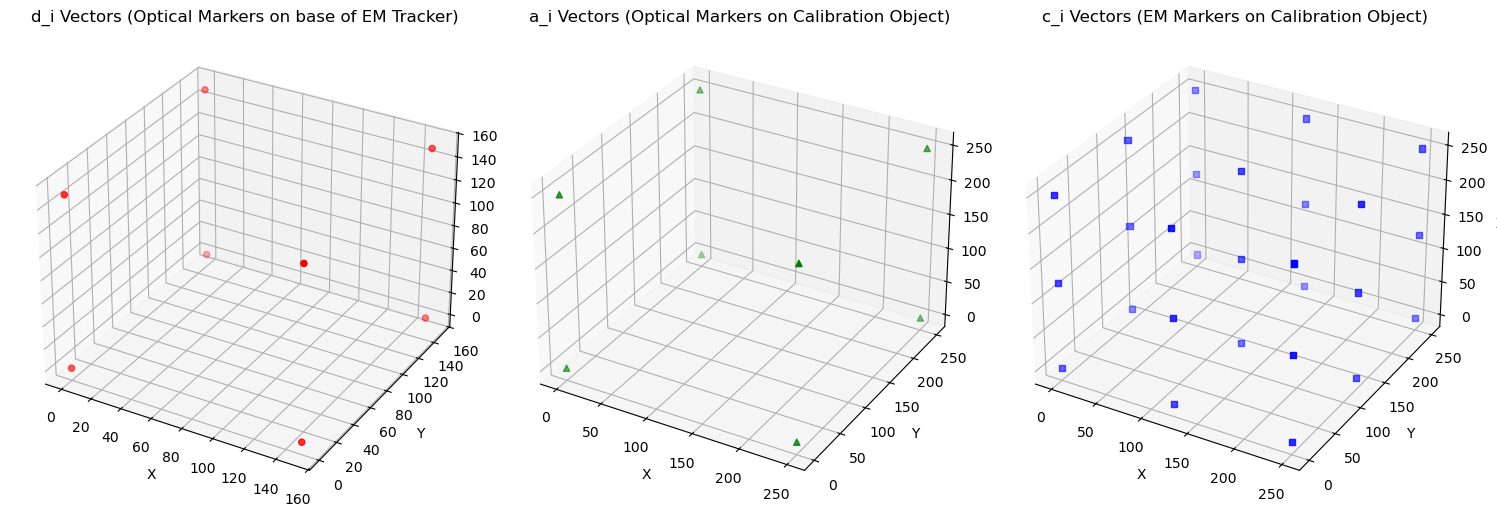

In [162]:
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(calbody_filepath)

print("d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):")
for vec in d_vectors:
    print()
    print(vec)
assert len(d_vectors) == N_D

print("\na_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):")
for vec in a_vectors:
    print(vec)
assert len(a_vectors) == N_A

print("\nc_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):")
for vec in c_vectors:
    print(vec)
assert len(c_vectors) == N_C

Debug.visualize_vectors(d_vectors, a_vectors, c_vectors)

In [163]:
frames_data = io.read_calreadings_file(calreadings_filepath)

for frame_num, frame_data in frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):")
    for vec in frame_data['A_vectors']:
        print(f"    {vec}")

    print("  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):")
    for vec in frame_data['C_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(-7.06, -5.15, -1499.97)
    Vector(-6.35, -4.64, -1349.98)
    Vector(-5.79, 144.84, -1500.50)
    Vector(-5.08, 145.36, -1350.50)
    Vector(142.94, -6.43, -1500.68)
    Vector(143.64, -5.91, -1350.68)
    Vector(144.21, 143.57, -1501.20)
    Vector(144.91, 144.08, -1351.20)
  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):
    Vector(206.97, 205.70, -1291.52)
    Vector(215.37, 205.71, -1041.66)
    Vector(204.57, 455.69, -1291.45)
    Vector(212.98, 455.70, -1041.59)
    Vector(456.82, 208.10, -1299.92)
    Vector(465.22, 208.11, -1050.06)
    Vector(454.42, 458.09, -1299.85)
    Vector(462.82, 458.10, -1049.99)
  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):
    Vector(206.40, 211.14, 216.80)
    Vector(215.29, 211.35, 341.34)
    Vector(222.83, 211.44, 462.67)
    Vector(211.85, 335.52, 210.11)
    Vector(213.20, 333.57, 335.79)
    Vector(214.76, 33

In [164]:
print("D_1")
for vec in frames_data[1]['D_vectors']:
    print(vec)

print("d_i")
for vec in d_vectors:
    print(vec)

# for frame_num, frame_data in frames_data.items():
    # Debug.plot_original_vs_transformed(d_vectors, frame_data['D_vectors']) 

D_1
Vector(-7.06, -5.15, -1499.97)
Vector(-6.35, -4.64, -1349.98)
Vector(-5.79, 144.84, -1500.50)
Vector(-5.08, 145.36, -1350.50)
Vector(142.94, -6.43, -1500.68)
Vector(143.64, -5.91, -1350.68)
Vector(144.21, 143.57, -1501.20)
Vector(144.91, 144.08, -1351.20)
d_i
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 150.00)
Vector(0.00, 150.00, 0.00)
Vector(0.00, 150.00, 150.00)
Vector(150.00, 0.00, 0.00)
Vector(150.00, 0.00, 150.00)
Vector(150.00, 150.00, 0.00)
Vector(150.00, 150.00, 150.00)


In [165]:
F_D_point_cloud = LA.perform_calibration_registration(frames_data, d_vectors, vector_type='D')

rmse_results = {}

for frame_num, frame in F_D_point_cloud.items():

    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in d_vectors]  # Source points (d_vectors)
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['D_vectors']]  # Target points

    transformed_d_points = LA.transform_points(frame, d_points)

    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R):", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t):", frame.translation)

    # Debug.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.0027003048453480005
Frame 1 Transformation Matrix (R): [[ 0.99995301  0.00847512  0.00470638]
 [-0.00849135  0.99995804  0.00343828]
 [-0.00467704 -0.00347808  0.99998301]]
Frame 1 Translation Vector (t): [   -7.05758711    -5.15287171 -1499.97583675]
Frame 2 RMSE: 0.0027667286340147257
Frame 2 Transformation Matrix (R): [[ 9.99979063e-01  6.41043372e-04  6.43913230e-03]
 [-5.92355308e-04  9.99971245e-01 -7.56034043e-03]
 [-6.44379365e-03  7.55636789e-03  9.99950688e-01]]
Frame 2 Translation Vector (t): [   -9.65694416    11.34110807 -1499.92602764]
Frame 3 RMSE: 0.0028125704266130924
Frame 3 Transformation Matrix (R): [[ 0.99996909  0.0020136   0.00760054]
 [-0.00195305  0.99996636 -0.00796612]
 [-0.00761633  0.00795103  0.99993938]]
Frame 3 Translation Vector (t): [  -11.4112424     11.95396165 -1499.90932017]
Frame 4 RMSE: 0.0025932076387107372
Frame 4 Transformation Matrix (R): [[ 0.99995859 -0.00630167  0.00656522]
 [ 0.00628151  0.9999755   0.00308758]
 [-0.006584

# 4.b Compute F_A 
Transformation from the optical tracker to calibration object

In [166]:
F_A_point_cloud = LA.perform_calibration_registration(frames_data, a_vectors, vector_type='A')

rmse_results = {}

for frame_num, frame in F_A_point_cloud.items():
    a_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in a_vectors]  # Source points (a_vectors)
    A_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['A_vectors']]  # Target points

    transformed_a_points = LA.transform_points(frame, a_points)

    transformed_array = np.array([v.as_array() for v in transformed_a_points])
    target_array = np.array([v.as_array() for v in A_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R):", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t):", frame.translation)

    # Debug.plot_3d_transformed_vs_target(frame_num, transformed_a_points, A_points)

Frame 1 RMSE: 0.0016406303038820624
Frame 1 Transformation Matrix (R): [[ 9.99389136e-01 -9.59291384e-03  3.36055103e-02]
 [ 9.59695423e-03  9.99953947e-01  4.10725651e-05]
 [-3.36043567e-02  2.81463069e-04  9.99435174e-01]]
Frame 1 Translation Vector (t): [  206.97103699   205.70100667 -1291.51903999]
Frame 2 RMSE: 0.002622200408950448
Frame 2 Transformation Matrix (R): [[ 0.99996362 -0.00750912 -0.00404675]
 [ 0.00745073  0.99987063 -0.01425541]
 [ 0.00415327  0.01422474  0.9998902 ]]
Frame 2 Translation Vector (t): [  204.86778201   217.50050403 -1048.78977484]
Frame 3 RMSE: 0.002490464597940445
Frame 3 Transformation Matrix (R): [[ 0.99987169 -0.00757289  0.01411564]
 [ 0.00734712  0.99984535  0.01597799]
 [-0.01423445 -0.01587223  0.9997727 ]]
Frame 3 Translation Vector (t): [  200.66444475   458.21743851 -1287.27325421]
Frame 4 RMSE: 0.0022940405178815126
Frame 4 Transformation Matrix (R): [[ 0.99917932 -0.02978973  0.02744551]
 [ 0.02911049  0.99926789  0.02482452]
 [-0.02816493

# 4.c Compute C_expected

Calculate C_expected from F D inverse, F A, and c_i




In [167]:
len(frames_data)

8

In [168]:
F_A_point_cloud = LA.perform_calibration_registration(frames_data, a_vectors, vector_type='A')

F_D_point_cloud = LA.perform_calibration_registration(frames_data, d_vectors, vector_type='D')

counter = 1
C_expected_vectors = {}
transformed_c_vectors = []
for count in range(1, 9):
    for c_vec in c_vectors:
        transformed_c_vectors.append(F_D_point_cloud[count].inv() @ F_A_point_cloud[count] @ c_vec)
    C_expected_vectors[count] = transformed_c_vectors 
    transformed_c_vectors = []

# 4.d Output the C_expected to Output-1.txt

Output vectors to text file




In [169]:

Nframes = len(C_expected_vectors)
NC = len(next(iter(C_expected_vectors.values())))  

output_file = 'output-1.txt'

with open(output_file, 'w') as file:
    file.write(f"{NC}, {Nframes}, NAME-OUTPUT-1.TXT\n")
    file.write("Px, Py, Pz\n") #TODO: FILL IN WITH 5 & 6
    file.write("Px, Py, Pz\n") #TODO: FILL IN WITH 5 & 6

    for frame_num, vectors in C_expected_vectors.items():
        for vector in vectors:
            file.write(f"{vector.coords[0]}, {vector.coords[1]}, {vector.coords[2]}\n")


# Q5. Find P_dimple of EM tracker

In [170]:
em_frames_data, N_G, N_frames  = io.read_empivot_file(empivot_filepath)

In [171]:
for frame_num, frame_data in em_frames_data.items():
    print(f"Frame {frame_num}:")

    print("  G_i Vectors (EM Markers on EM Tracker):")
    for vec in frame_data["G_vectors"]:
        print(f"    {vec}")

Frame 1:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(182.85, 178.76, 254.75)
    Vector(176.66, 178.42, 303.26)
    Vector(170.59, 178.11, 350.89)
    Vector(201.13, 214.56, 257.02)
    Vector(194.24, 214.02, 305.93)
    Vector(187.47, 213.55, 354.09)
Frame 2:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(193.26, 173.50, 255.23)
    Vector(193.45, 169.39, 304.56)
    Vector(193.94, 165.34, 353.05)
    Vector(203.24, 212.12, 257.87)
    Vector(202.69, 207.82, 307.50)
    Vector(202.45, 203.63, 356.39)
Frame 3:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(236.75, 207.16, 245.02)
    Vector(282.56, 215.37, 265.08)
    Vector(327.98, 223.29, 284.82)
    Vector(253.84, 203.59, 208.47)
    Vector(299.71, 211.93, 228.49)
    Vector(345.12, 220.00, 248.28)
Frame 4:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(164.70, 235.88, 212.92)
    Vector(133.91, 263.89, 235.99)
    Vector(102.30, 291.51, 258.68)
    Vector(172.07, 215.24, 247.49)
    Vector(141.18, 243.16,

In [172]:
G0_vectors = LA.compute_centroid_vectors(em_frames_data, vector_type='G')

print("G0 Vectors (Centroids of G_vectors for each frame):")
for idx, vec in enumerate(G0_vectors):
    print(f"  Frame {idx + 1}: {vec}")

G0 Vectors (Centroids of G_vectors for each frame):
  Frame 1: Vector(185.49, 196.24, 304.32)
  Frame 2: Vector(198.17, 188.63, 305.77)
  Frame 3: Vector(290.99, 213.56, 246.69)
  Frame 4: Vector(137.28, 253.39, 252.98)
  Frame 5: Vector(166.54, 282.86, 235.36)
  Frame 6: Vector(163.61, 287.96, 191.22)
  Frame 7: Vector(129.68, 264.98, 210.88)
  Frame 8: Vector(277.30, 233.10, 144.22)
  Frame 9: Vector(211.54, 296.39, 210.60)
  Frame 10: Vector(207.99, 293.38, 171.81)
  Frame 11: Vector(225.15, 268.39, 269.27)
  Frame 12: Vector(126.65, 240.91, 251.34)


In [173]:
em_frames_data[1]

{'G_vectors': [<LinAlg.Vector at 0x202bab39370>,
  <LinAlg.Vector at 0x202baa2dbb0>]}

In [174]:
g_i_vectors = LA.compute_local_marker_vectors(em_frames_data, vector_type='G')

In [175]:
for frame_num, frame_data in em_frames_data.items():
    frame_data["G_vectors"]

In [176]:
F_G_frames = {}


for frame_num in em_frames_data:
    em_frames_data_frame = {frame_num: em_frames_data[frame_num]}
    result = LA.perform_calibration_registration(em_frames_data_frame, g_i_vectors, vector_type='G')
    F_G_frames.update(result)

In [177]:
F_G = np.array([np.array(frame) for frame in F_G_frames.values()])
t_G, p_pivot = PC.pivot_calibration(F_G)
p_pivot

array([201.02034968, 196.55713115, 205.45611939])

In [178]:
t_G

array([ 13.79279814,   1.29668978, -99.02525163])

In [179]:
F_G_frames

{1: <LinAlg.Frame at 0x202b2d01f40>,
 2: <LinAlg.Frame at 0x202b2b19c40>,
 3: <LinAlg.Frame at 0x202b2bd07d0>,
 4: <LinAlg.Frame at 0x202baa5a6c0>,
 5: <LinAlg.Frame at 0x202ba9ba9f0>,
 6: <LinAlg.Frame at 0x202b481c380>,
 7: <LinAlg.Frame at 0x202ba9e8a40>,
 8: <LinAlg.Frame at 0x202bb40a810>,
 9: <LinAlg.Frame at 0x202bab39d30>,
 10: <LinAlg.Frame at 0x202baaa14f0>,
 11: <LinAlg.Frame at 0x202baac41a0>,
 12: <LinAlg.Frame at 0x202babbb2f0>}

In [180]:
t_G_transformed = LA.transform_points(F_G_frames[1], [t_G])

t_G_transformed = t_G_transformed[0]
print(t_G_transformed)

[199.28278838 197.53336886 205.29808211]


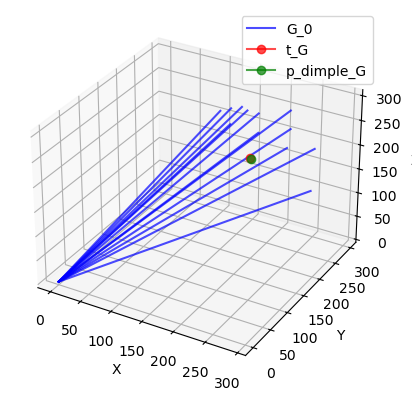

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


origin = np.array([0, 0, 0])
for idx, vec in enumerate(G0_vectors):
    vec_array = vec.as_array()
    ax.plot([origin[0], vec_array[0]], [origin[1], vec_array[1]], [origin[2], vec_array[2]], color='b', alpha=0.7, label=f"G_0" if idx == 0 else "")

ax.plot(t_G_transformed[0], t_G_transformed[1], t_G_transformed[2], marker='o', color='r', label='t_G', alpha = 0.7)
ax.plot(p_pivot[0], p_pivot[1], p_pivot[2], marker='o', color='g', label='p_dimple_G', alpha = 0.7)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()


# Q6  find dimple and pointer vec

In [182]:
opt_frames_data, N_D, N_H, N_frames  = io.read_optpivot_file(optpivot_filepath)

Visualize data

In [183]:
# Output the vectors for each frame
for frame_num, frame_data in opt_frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  H_i Vectors (OPT Markers on probe, wrt Optical tracker):")
    for vec in frame_data['H_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(3.22, -2.53, -1499.99)
    Vector(2.90, -2.27, -1349.99)
    Vector(3.32, 147.47, -1500.25)
    Vector(3.00, 147.73, -1350.25)
    Vector(153.22, -2.62, -1499.67)
    Vector(152.90, -2.37, -1349.67)
    Vector(153.32, 147.38, -1499.92)
    Vector(153.00, 147.63, -1349.92)
  H_i Vectors (OPT Markers on probe, wrt Optical tracker):
    Vector(365.43, 378.74, -1259.51)
    Vector(341.10, 377.23, -1215.85)
    Vector(316.76, 375.72, -1172.20)
    Vector(403.10, 403.32, -1237.66)
    Vector(378.76, 401.81, -1194.01)
    Vector(354.42, 400.30, -1150.35)
Frame 2:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(-1.72, 5.25, -1499.99)
    Vector(-1.55, 4.72, -1349.99)
    Vector(-0.43, 155.24, -1499.47)
    Vector(-0.26, 154.72, -1349.47)
    Vector(148.27, 3.96, -1500.17)
    Vector(148.45, 3.43, -1350.17)
    Vector(149.57, 153.95, -1499.64)
    Vector(149.74, 153.42, -1349.6

Find H0

H0 Vectors (Centroids of H_vectors for each frame):
  Frame 1: Vector(359.93, 389.52, -1204.93)
  Frame 2: Vector(404.80, 480.26, -1345.30)
  Frame 3: Vector(351.56, 421.47, -1205.15)
  Frame 4: Vector(355.29, 475.45, -1302.09)
  Frame 5: Vector(340.39, 461.69, -1315.77)
  Frame 6: Vector(361.22, 453.04, -1349.24)
  Frame 7: Vector(416.22, 396.03, -1195.98)
  Frame 8: Vector(307.54, 407.90, -1264.18)
  Frame 9: Vector(466.39, 485.18, -1288.84)
  Frame 10: Vector(380.96, 468.38, -1350.31)
  Frame 11: Vector(492.48, 459.10, -1304.01)
  Frame 12: Vector(364.74, 457.98, -1238.82)


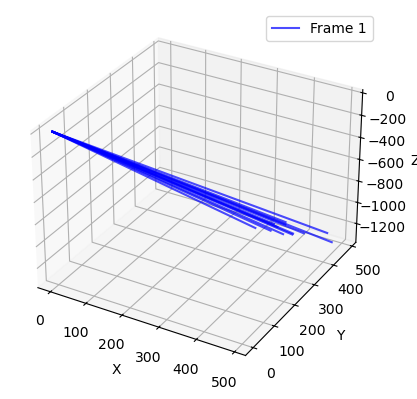

In [184]:
H0_vectors = LA.compute_centroid_vectors(opt_frames_data, vector_type='H')

print("H0 Vectors (Centroids of H_vectors for each frame):")
for idx, vec in enumerate(H0_vectors):
    print(f"  Frame {idx + 1}: {vec}")


Debug.visualize_H0_vectors(H0_vectors)


Find h_i for each frame

In [185]:
hi_vectors = LA.compute_local_marker_vectors(opt_frames_data, vector_type='H')
    

Get new F_D

In [186]:
F_D_opt_point_cloud = LA.perform_calibration_registration(opt_frames_data, d_vectors, vector_type='D')

rmse_results = {}

for frame_num, frame in F_D_opt_point_cloud.items():
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in d_vectors]  
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in opt_frames_data [frame_num]['D_vectors']] 


    transformed_d_points = LA.transform_points(frame, d_points)
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R): \n", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t): \n", frame.translation)

    # Debug.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.002447853097692132
Frame 1 Transformation Matrix (R): 
 [[ 9.99997478e-01  6.51838005e-04 -2.14930246e-03]
 [-6.48183184e-04  9.99998344e-01  1.70072695e-03]
 [ 2.15040750e-03 -1.69932952e-03  9.99996244e-01]]
Frame 1 Translation Vector (t): 
 [    3.22249931    -2.52631569 -1499.99106868]
Frame 2 RMSE: 0.002738318173214793
Frame 2 Transformation Matrix (R): 
 [[ 0.99996221  0.00861865  0.00114337]
 [-0.00861458  0.99995672 -0.00351338]
 [-0.0011736   0.0035034   0.99999317]]
Frame 2 Translation Vector (t): 
 [   -1.72056463     5.24909312 -1499.99172781]
Frame 3 RMSE: 0.002519116271287203
Frame 3 Transformation Matrix (R): 
 [[ 0.99995883 -0.00757325  0.00499882]
 [ 0.00759359  0.99996291 -0.00406451]
 [-0.00496785  0.0041023   0.99997925]]
Frame 3 Translation Vector (t): 
 [   -7.49133118     6.0881014  -1499.96850065]
Frame 4 RMSE: 0.0025742361322045326
Frame 4 Transformation Matrix (R): 
 [[ 9.99983764e-01 -5.61226042e-03  9.86863587e-04]
 [ 5.60451209e-03  9.999547

Calculate F_H

In [187]:
F_H_opt_point_cloud = LA.perform_pivot_registration(opt_frames_data, hi_vectors, vector_type='H')

rmse_results = {}

for frame_num, frame in F_H_opt_point_cloud.items():
    hi_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in hi_vectors]
    H_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in opt_frames_data [frame_num]['H_vectors']]  # Target points

    transformed_h_points = LA.transform_points(frame, hi_points)
    transformed_array = np.array([v.as_array() for v in transformed_h_points])
    target_array = np.array([v.as_array() for v in H_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R): \n", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t): \n", frame.translation)

    H_points.append(LA.Vector(H0_vectors[frame_num-1].coords[0], H0_vectors[frame_num-1].coords[1], H0_vectors[frame_num-1].coords[2]))

    # Debug.plot_3d_transformed_vs_target(frame_num, transformed_h_points, H_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): 
 [[ 1.00000000e+00 -2.64350445e-25 -1.20012880e-23]
 [ 2.64350445e-25  1.00000000e+00 -2.61196011e-23]
 [ 1.20012880e-23  2.61196011e-23  1.00000000e+00]]
Frame 1 Translation Vector (t): 
 [  359.92834473   389.52001953 -1204.92993164]
Frame 2 RMSE: 0.004638638347387314
Frame 2 Transformation Matrix (R): 
 [[ 0.78578769  0.45126055  0.42296763]
 [-0.17387099 -0.49511571  0.85125161]
 [ 0.59355419 -0.74244484 -0.31059472]]
Frame 2 Translation Vector (t): 
 [  404.80004205   480.25671418 -1345.30001884]
Frame 3 RMSE: 0.0037567485123872757
Frame 3 Transformation Matrix (R): 
 [[ 0.99707605  0.05975765  0.04762736]
 [-0.06827806  0.97656381  0.20411082]
 [-0.03431397 -0.20676592  0.97778853]]
Frame 3 Translation Vector (t): 
 [  351.56501164   421.4733647  -1205.15493331]
Frame 4 RMSE: 0.0037256034556776285
Frame 4 Transformation Matrix (R): 
 [[-0.12159825  0.80859189 -0.57566745]
 [-0.55862183  0.42365102  0.71306484]
 [ 0.82046055  0

In [188]:
F_D_inv = {}

for frame_num in F_D_opt_point_cloud:
    frame_D_inv = F_D_opt_point_cloud[frame_num].inv()
    F_D_inv[frame_num] = frame_D_inv

F_DH_opt_point_cloud = LA.combine_frames(F_D_inv, F_H_opt_point_cloud)

t_H, p_dimple_H = PC.solve_for_pointer_and_dimple(F_DH_opt_point_cloud)

print(t_H)
print(p_dimple_H)

[[ 48.67069768]
 [  3.02098616]
 [-87.30515037]]
[[405.57431844]
 [394.97186213]
 [207.55481116]]


In [189]:
t_H_transformed =[]

for frame_num, frame in F_DH_opt_point_cloud.items():
    t_H_transformed.append(frame @ LA.Vector(t_H.flatten()[0], t_H.flatten()[1], t_H.flatten()[2]))

t_H_transformed = t_H_transformed[0]
print(t_H_transformed)


Vector(405.57, 394.98, 207.56)


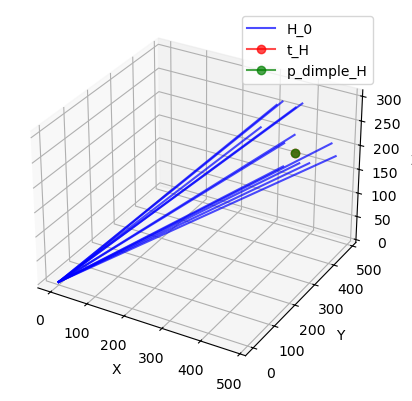

In [190]:
H0_transformed =[]
for frame_num, frame in F_D_inv.items():
    H0_transformed.append(frame @ H0_vectors[frame_num - 1])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


origin = np.array([0, 0, 0])
for idx, vec in enumerate(H0_transformed):
    vec_array = vec.as_array()
    ax.plot([origin[0], vec_array[0]], [origin[1], vec_array[1]], [origin[2], vec_array[2]], color='b', alpha=0.7, label=f"H_0" if idx == 0 else "")

ax.plot(t_H_transformed.coords[0], t_H_transformed.coords[1], t_H_transformed.coords[2], marker='o', color='r', label='t_H', alpha = 0.7)
ax.plot(p_dimple_H[0], p_dimple_H[1], p_dimple_H[2], marker='o', color='g', label='p_dimple_H', alpha = 0.7)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

